In [ ]:
from sklearn.datasets import load_boston

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=load_boston()

In [ ]:
data


{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
dataset=pd.DataFrame(data.data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
dataset.columns=data.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data.target.shape

(506,)

In [ ]:
#creating new dataframe Price
dataset['Price']=data.target

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
#linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # performing cross validation means performing some experiments
lin_r=LinearRegression()
mse=cross_val_score(lin_r,X,y,scoring='neg_mean_squared_error',cv=5)
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [ ]:
mean_mse=np.mean(mse)
print(mean_mse)

-37.131807467699055


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
linear=LinearRegression()
model=linear.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([34.4081095 , 31.18524626, 22.31286141, 17.88613877, 20.43572131,
       26.14444413, 26.21920244, 23.57978445, 22.41577853, 19.51182817,
       26.86691495, 17.20411302, 20.68511041, 15.67921778, 41.69912781,
       20.2946735 , 28.99258631, 19.06413492, 32.48035595, 41.13627224,
       34.64732462, 16.38997909, 20.42215729, 18.05324255, 13.38743087,
       12.64800748, 27.45930237, 20.30199107, 18.78954741, 20.24950994,
       15.60161419, 24.38040555, 38.95651978, 24.7184131 , 31.26791961,
       28.26279775, 15.84707127, 14.76661568, 16.79024244, 23.23674899,
       22.85417065, 23.48976177, 14.16818173, 21.42613087, 32.38362329,
       26.7881669 , 19.37574824, 15.27894103, 17.21175121, 12.91591919,
       21.84063224, 20.25050371, 23.65622638, 23.9608324 , 11.94749102,
       14.49718052, 24.69872363, 34.18169066, 10.30437821, 21.04686616,
       17.96204214, 19.76593459, 17.45231513, 29.982971  , 20.73183476,
       25.24657823, 15.81416285, 24.96705225, 22.1298931 , 20.77

In [ ]:
y_test.head(),y_pred[0:5]

(198    34.6
 229    31.5
 502    20.6
 31     14.5
 315    16.2
 Name: Price, dtype: float64,
 array([34.4081095 , 31.18524626, 22.31286141, 17.88613877, 20.43572131]))

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7555033086871306

In [ ]:
y_test.dtypes

dtype('float64')

In [ ]:
#Ridge Regression
#,'max_iter' : [2000,3000,4000,5000,6000, 7000,10000],
#'random_state' : [10,23,42,67,87,100,200]

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,150,200],'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 150, 200],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150, 'solver': 'auto'}
-29.753617234142705


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
rid=Ridge(alpha=150,solver='auto')
model2=rid.fit(x_train,y_train)
model2

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred1=model2.predict(x_test)
y_pred1

array([28.39827716, 29.46521481, 18.95626994, 11.77456162, 13.47631029,
       29.63665287, 11.27153119, 19.28527153, 30.47492319, 14.95597299,
        5.94707392, 20.5886788 , 24.47246633, 19.3924655 , 33.6743539 ,
       28.36304427, 11.64380772, 29.39804607, 26.10510064, 11.19373679,
       24.34147339, 13.98376128, 12.00933408, 35.48099749, 31.46601447,
       21.00523682, 28.49486947, 29.63512642, 32.07980706, 15.8597874 ,
       21.07392518, 17.54893846, 10.80108323, 29.4996211 , 24.49710772,
       15.39356519, 26.42600687, 32.1541763 , 21.99811199, 25.78628987,
       24.45962384, 33.93201652, 24.22953091, 14.32334156, 38.61899506,
       10.06175342, 19.01100381, 20.34767842, 12.05081103, 23.66505676,
       22.86428485, 23.68859222, 13.62558615, 19.10338663,  5.61168267,
       27.99948206, 15.30638961, 20.77992167, 28.26555575, 35.12850974,
       17.13854873, 18.59131385, 15.27516845, 31.71822923, 20.71663672,
       29.75427756, 27.86058943, 19.54737068, 20.82686329, 13.18

In [ ]:
y_test.head(),y_pred1[0:5]

(222    27.5
 223    30.1
 354    18.2
 423    13.4
 383    12.3
 Name: Price, dtype: float64,
 array([28.39827716, 29.46521481, 18.95626994, 11.77456162, 13.47631029]))

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred1)
score

0.7064067406029126

In [ ]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,150,200]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2542.94634

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
las=Lasso(alpha=1)
model3=las.fit(x_train,y_train)
model3

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
y_pred2=model3.predict(x_test)
y_pred2

array([32.20611844, 30.52979568, 24.17397797, 20.31003278, 23.08698928,
       25.77979631, 24.56541415, 23.53145999, 21.57880694, 19.98925869,
       28.41699529, 18.59958511, 21.30663836, 17.16905916, 37.68182104,
       24.16539795, 30.24260464, 21.71728208, 30.30790112, 33.54789578,
       32.56327829, 16.99767149, 19.72423627, 19.27550852, 14.43885788,
       13.915087  , 29.63745966, 17.73178288, 18.94191846, 21.91616684,
       17.65488739, 24.78345361, 32.6039182 , 25.67303924, 28.54858853,
       29.19687909, 19.74694088, 16.73164444, 14.82490188, 24.79746847,
       24.38970269, 23.77600492, 15.14174173, 21.58942466, 30.36222218,
       26.81138191, 19.09988929, 18.42012927, 16.45218759, 14.9985904 ,
       25.03883064, 20.14148793, 25.91318609, 24.89548007, 11.84135694,
       15.04191091, 26.33542784, 33.73347589, 10.07681946, 20.19147436,
       15.95162883, 15.86513622, 21.98841077, 29.42235905, 24.16005316,
       24.65717442, 16.59483368, 30.5439849 , 23.11284346, 22.44

In [ ]:
y_test.head(),y_pred2[0:5]

(198    34.6
 229    31.5
 502    20.6
 31     14.5
 315    16.2
 Name: Price, dtype: float64,
 array([32.20611844, 30.52979568, 24.17397797, 20.31003278, 23.08698928]))

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred2)
score

0.6776294232065305

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)


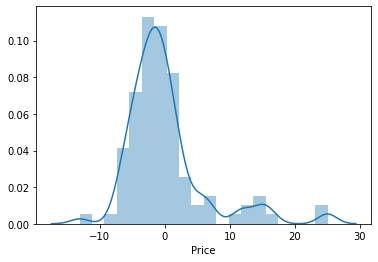

In [ ]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

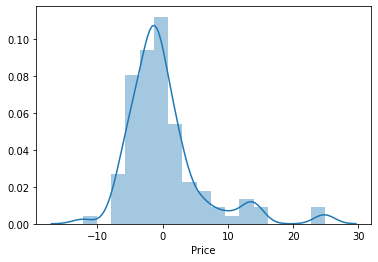

In [ ]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)